<a href="https://colab.research.google.com/github/NgonidzasheJacob/AiAssignment/blob/main/assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R187470B
## Nyasha D. Chiroro
### Assigment 2

### Link to the application
[https://streamlit-churn.herokuapp.com/](https://streamlit-churn.herokuapp.com/)
### Note: The application may take time to start as it will be on idle

### Link to the assignment's GitHub repository
[https://github.com/LeCodeAlchemist/ai_assignment_2](https://github.com/LeCodeAlchemist/ai_assignment_2)

### Link to explanation video on Google Drive
[https://drive.google.com/file/d/1nfGn9OYVubim7KSYH2tuc3xwi4o_muqT/view?usp=sharing](https://drive.google.com/file/d/1nfGn9OYVubim7KSYH2tuc3xwi4o_muqT/view?usp=sharing)

# Importing required libraries

In [6]:
import numpy as np # for linear algebra, calculating mean, standard deviation etc
import pandas as pd # load and manipulate data for One-Hot Encoding, data processing, CSV file I/O
import seaborn as sns # for creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import xgboost as xgb # XGBoost stuff
from sklearn.model_selection import train_test_split # split the data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer 
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws the confusion matrix

sns.set(style = 'white')

In [7]:
!pip install dython

In [8]:
#data import from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assign2/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


dataframe.head()

In [10]:
dataframe.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [11]:
#viewing datatypes
dataframe.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
#setting totalcharges datatype to numeric
dataframe.TotalCharges =  pd.to_numeric(dataframe.TotalCharges, errors='coerce')


In [13]:
#check for all missing values
dataframe.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
dataframe.loc[dataframe.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
dataframe[dataframe.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [16]:
# Setting the TotalCharges to 0 for rows that have a missing value
dataframe.loc[dataframe.TotalCharges.isnull(), 'TotalCharges'] = 0

In [17]:
#verifying
dataframe.loc[dataframe.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [18]:
#converting churn column values to binary numerical values
churned = len(dataframe.loc[dataframe.Churn == 'Yes'])
not_churned = len(dataframe.loc[dataframe.Churn == 'No'])

print(f'Churned: {churned}')
print(f'Did not churn: {not_churned}')

Churned: 1869
Did not churn: 5174


In [19]:
dataframe['Churn'].replace(to_replace='Yes', value=1, inplace=True)
dataframe['Churn'].replace(to_replace='No', value=0, inplace=True)

In [20]:
#verifying
churned = len(dataframe.loc[dataframe.Churn == 1])
not_churned = len(dataframe.loc[dataframe.Churn == 0])

print(f'Churned: {churned}')
print(f'Did not churn: {not_churned}')

Churned: 1869
Did not churn: 5174


In [21]:
not_seniors = len(dataframe.loc[dataframe.SeniorCitizen == 0])
seniors = len(dataframe.loc[dataframe.SeniorCitizen == 1])

print(f'Not seniors: {not_seniors}')
print(f'Seniors: {seniors}')

Not seniors: 5901
Seniors: 1142


In [22]:
# Convert Seniors into a categorical Yes and No column.
dataframe.SeniorCitizen = dataframe.SeniorCitizen.astype(str)
dataframe.SeniorCitizen.replace(to_replace='0', value='No', inplace=True)
dataframe.SeniorCitizen.replace(to_replace='1', value='Yes', inplace=True)

# Confirm change
not_seniors = len(dataframe.loc[dataframe.SeniorCitizen == 'No'])
seniors = len(dataframe.loc[dataframe.SeniorCitizen == 'Yes'])
print(f'Not seniors: {not_seniors}')
print(f'Seniors: {seniors}')

Not seniors: 5901
Seniors: 1142


In [23]:
#check and eliminate useless values
unique_values = []
for column in dataframe.columns:
    unique_values.append({column: len( dataframe[column].unique())})

In [24]:
unique_values

[{'customerID': 7043},
 {'gender': 2},
 {'SeniorCitizen': 2},
 {'Partner': 2},
 {'Dependents': 2},
 {'tenure': 73},
 {'PhoneService': 2},
 {'MultipleLines': 3},
 {'InternetService': 3},
 {'OnlineSecurity': 3},
 {'OnlineBackup': 3},
 {'DeviceProtection': 3},
 {'TechSupport': 3},
 {'StreamingTV': 3},
 {'StreamingMovies': 3},
 {'Contract': 3},
 {'PaperlessBilling': 2},
 {'PaymentMethod': 4},
 {'MonthlyCharges': 1585},
 {'TotalCharges': 6531},
 {'Churn': 2}]

In [25]:
#removing column with one unique values
len(dataframe['customerID']) ==  len(dataframe['customerID'].unique())

True

In [26]:
dataframe.drop(columns=['customerID'], inplace=True)
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [71]:
#replacing all the whitespaces with under "_"
dataframe.replace(" ", "_", regex=True, inplace=True)
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
3,Male,No,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1


# Question 1

analysing the distrubition of gender, age range ,partner and dependend status of the customers

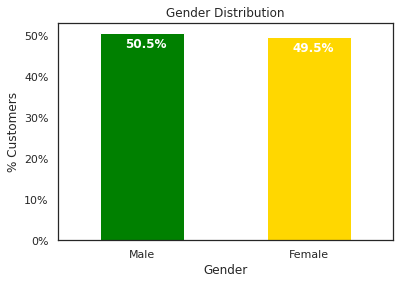

In [74]:
#gender distrubition
colors = ['#008000','#FFD700']

# Plot the percentage of each gender
ax = (dataframe['gender'].value_counts()*100.0 /len(dataframe)).plot(kind='bar',
                                                                   stacked = True,
                                                                   rot = 0,
                                                                   color = colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, 'percentage of Snr citizens')

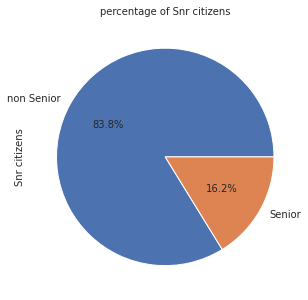

In [72]:
#senior citizens distrubition
ax =  (dataframe.SeniorCitizen.value_counts() * 100 / len(dataframe)).plot.pie(autopct='%.1f%%', labels = ['non Senior', 'Senior'],figsize =(5,5), fontsize = 10 )

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Snr citizens',fontsize = 10)
ax.set_title('percentage of Snr citizens', fontsize = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

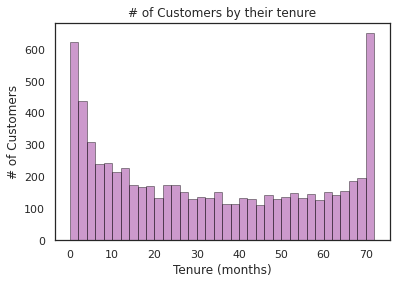

In [75]:
#tenure distrubition
ax = sns.distplot(dataframe['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

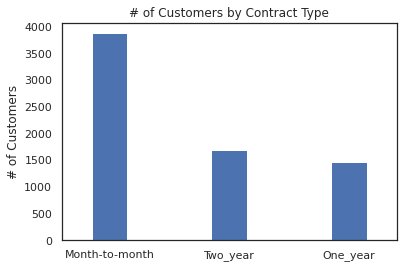

In [31]:
#distrubition by contract
ax = dataframe['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

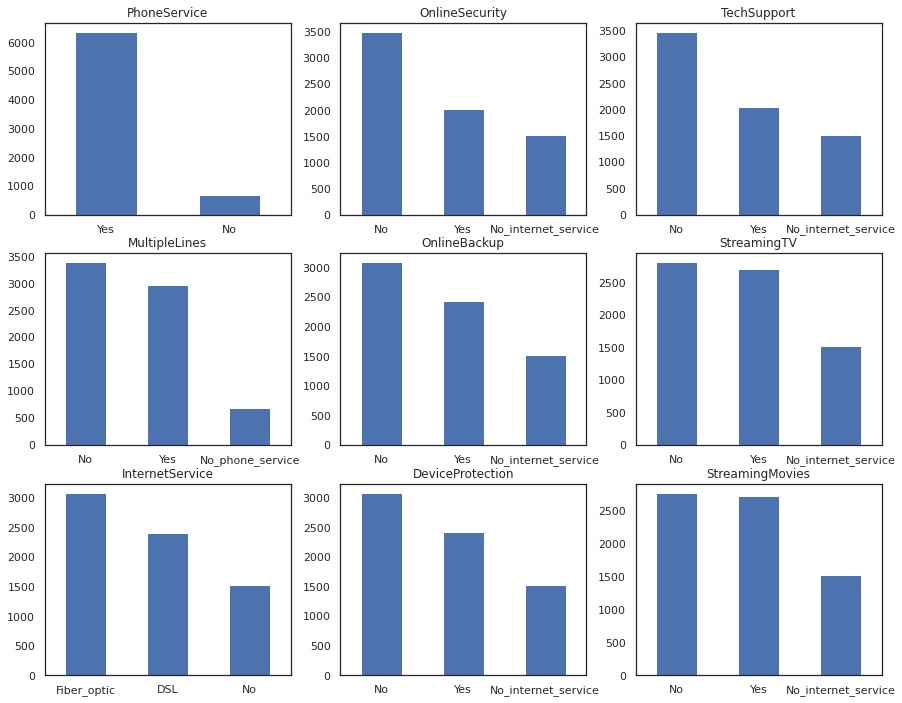

In [32]:
#distribution of various services used by customers
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = dataframe[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = dataframe[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = dataframe[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


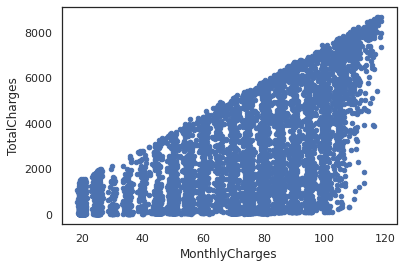

In [33]:
#Relation between monthly and total charges
dataframe[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

We will observe that the total charges increases as the monthly bill for a customer increases.

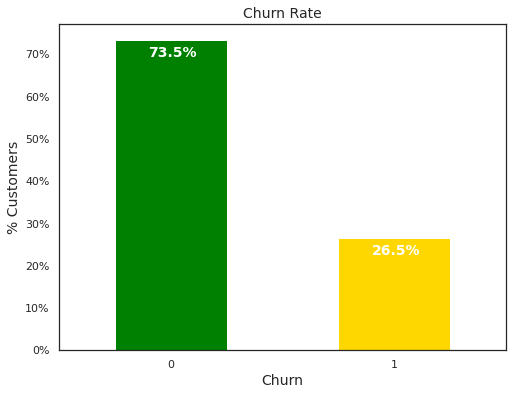

In [76]:
#CHURN RATE


colors = ['GREEN','GOLD']
ax = (dataframe['Churn'].value_counts()*100.0 /len(dataframe)).plot(kind='bar',
                                                                      stacked = True,
                                                                      rot = 0,
                                                                      color = colors,
                                                                      figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold',
            size = 14)

In [35]:
#CORRELATIONS IN THE DATA

corr = dataframe.corr()
corr

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.826178,0.651174,1.000000,-0.198324
Churn,-0.352229,0.193356,-0.198324,1.000000


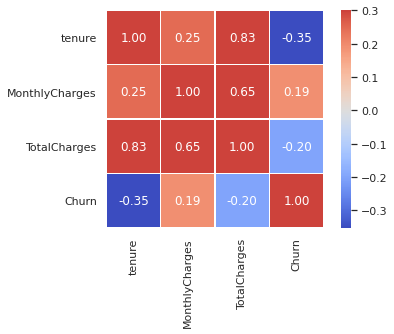

In [36]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,  vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')

In [37]:
from dython.nominal import associations

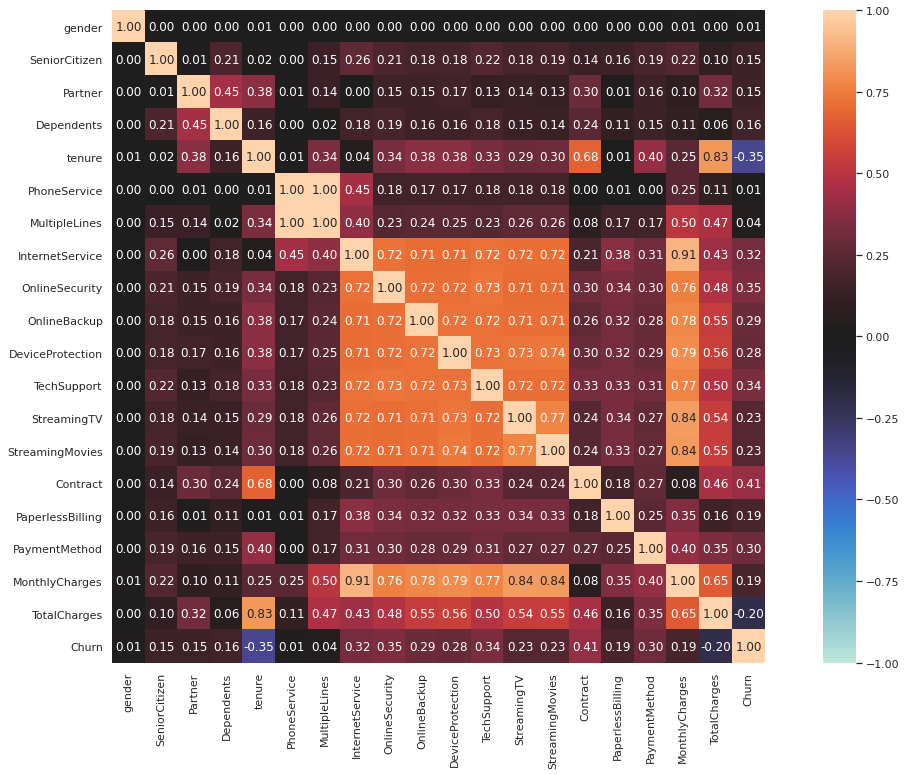

In [38]:
assc = associations(dataframe, figsize=(21, 12))

In [39]:
# corr_df = pd.DataFrame(assc['corr'])
# corr_df

In [40]:
#FEATURES WHICH MIGHT BE RELEVANT 

selected_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract',  'MultipleLines','PaperlessBilling', 'PaymentMethod','TotalCharges', 'MonthlyCharges']

In [41]:
#SPLITTING DEPENDED AND NON-DEPENDED VARIABLES AND 1 HOT ENCODING


# X = dataframe.drop(columns=['Churn']).copy()
X = dataframe.loc[:, selected_features].copy()
X.head()

,gender,SeniorCitizen,Partner,Dependents,Contract,MultipleLines,PaperlessBilling,PaymentMethod,TotalCharges,MonthlyCharges
0,Female,No,Yes,No,Month-to-month,No_phone_service,Yes,Electronic_check,29.85,29.85
1,Male,No,No,No,One_year,No,No,Mailed_check,1889.50,56.95
2,Male,No,No,No,Month-to-month,No,Yes,Mailed_check,108.15,53.85
3,Male,No,No,No,One_year,No_phone_service,No,Bank_transfer_(automatic),1840.75,42.30
4,Female,No,No,No,Month-to-month,No,Yes,Electronic_check,151.65,70.70


In [42]:
y = dataframe.Churn.copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### One Hot Encoding

In [43]:
#1 HOT ENCODING

X.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
Contract             object
MultipleLines        object
PaperlessBilling     object
PaymentMethod        object
TotalCharges        float64
MonthlyCharges      float64
dtype: object

In [44]:
# X_encoded = pd.get_dummies(X, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
#                                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#                                         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MultipleLines']
X_encoded = pd.get_dummies(X, columns=categories)

# from sklearn.compose import ColumnTransformer

# categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MultipleLines']
# transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categories)], remainder='passthrough')
# X_encoded = transformer.fit_transform(X)
# type(X_encoded)

In [45]:
X_encoded

,TotalCharges,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,MultipleLines_No,MultipleLines_No_phone_service,MultipleLines_Yes
0,29.85,29.85,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
1,1889.50,56.95,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
2,108.15,53.85,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0
3,1840.75,42.30,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,151.65,70.70,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1
7039,7362.90,103.20,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
7040,346.45,29.60,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0
7041,306.60,74.40,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1


In [46]:
y.unique()

array([0, 1])

# FIRST XGBoost Model

### Checking for data imbalance

In [47]:
#CHECKING FOR DATA IMBALANCES

percentage_left = sum(y) / len(y)
percentage_left

0.2653698707936959

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [49]:
#VERIFYING THE STRATIFICATION PROCESS
sum(y_train)/len(y_train)

0.2654297614539947

In [50]:
sum(y_test)/len(y_test)

0.26519023282226006

### Evaluation functions

In [51]:
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_fscore_support

In [52]:
def print_evaluation_metric (y_true, y_pred):
    #
    # Function to print out the model evaluation metrics
    # Args:
    #   y_true: array of y true label
    #   y_pred: array of y predicted class
    #
    # Return:
    #   None
    #
    precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred)
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("F-score: {}".format(fscore))
    print("Support: {}".format(support))
    return 

def plot_roc_curve (y_true, y_prob, filename="img.png", dpi = 200):
    #
    # Function to plot the ROC curve by computing fpr and tpr as well as save the plot to file
    # Args:
    #   y_true: array of y true label
    #   y_prob: the output of y probability prediction (outcome for predict_proba() function)
    #   filename: the name of the file to be saved
    #   dpi: the resolution of the figure
    # Return:
    #   None
    #
    fpr, tpr, threshold = roc_curve(y_true, y_prob[:, 1])
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.plot(fpr, tpr, 'b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    fig.savefig(filename, dpi = dpi)
    return

### INITIAL MODEL DEFINITION AND TRAINING

In [53]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42)
clf_xgb.fit(X_train,
              y_train,
              verbose=True,
              early_stopping_rounds=30,
              eval_metric='aucpr',
              eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.555559
Will train until validation_0-aucpr hasn't improved in 30 rounds.
[1]	validation_0-aucpr:0.557939
[2]	validation_0-aucpr:0.568986
[3]	validation_0-aucpr:0.605011
[4]	validation_0-aucpr:0.60395
[5]	validation_0-aucpr:0.608465
[6]	validation_0-aucpr:0.609509
[7]	validation_0-aucpr:0.616878
[8]	validation_0-aucpr:0.617117
[9]	validation_0-aucpr:0.618097
[10]	validation_0-aucpr:0.621103
[11]	validation_0-aucpr:0.624234
[12]	validation_0-aucpr:0.62462
[13]	validation_0-aucpr:0.623412
[14]	validation_0-aucpr:0.627643
[15]	validation_0-aucpr:0.631037
[16]	validation_0-aucpr:0.633289
[17]	validation_0-aucpr:0.635401
[18]	validation_0-aucpr:0.635285
[19]	validation_0-aucpr:0.634775
[20]	validation_0-aucpr:0.634105
[21]	validation_0-aucpr:0.636281
[22]	validation_0-aucpr:0.635574
[23]	validation_0-aucpr:0.6373
[24]	validation_0-aucpr:0.636203
[25]	validation_0-aucpr:0.638192
[26]	validation_0-aucpr:0.640088
[27]	validation_0-aucpr:0.639238
[28]	validation_0-aucpr:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

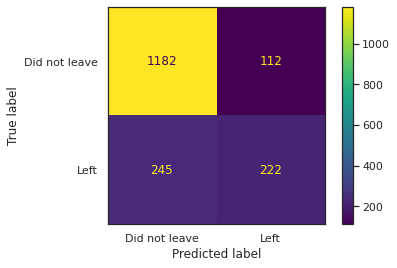

In [54]:
#TESTING DATASET AND DRAWING CONFUSION MATRIX
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                     display_labels=['Did not leave', 'Left'])

<b>1294</b> people <b>who did not leave</b>
 <b>1182 (91%)</b> were correctly classified. 
 And of the<b>467</b> people that <b>left the company</b> 
 <b>222 (47%)</b> were correctly classified. Hence there XGBoost model was not awesome. 

In [55]:
y_pred =  clf_xgb.predict(X_test)

In [56]:
y_prob =  clf_xgb.predict_proba(X_test)

In [57]:
print_evaluation_metric(y_test, y_pred)

Precision: [0.82831114 0.66467066]
Recall: [0.91344668 0.47537473]
F-score: [0.86879824 0.55430712]
Support: [1294  467]


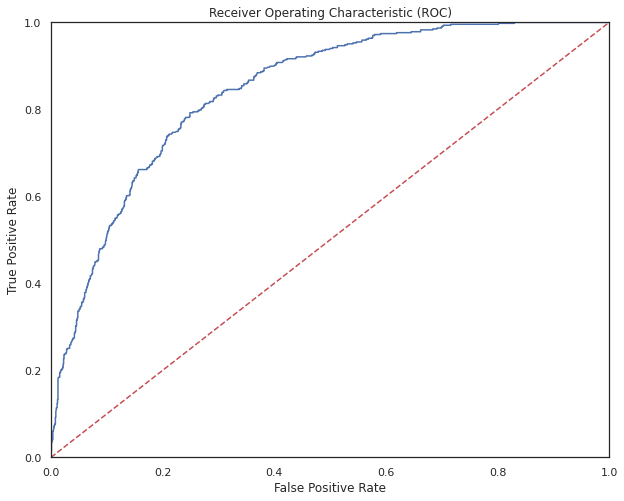

In [58]:
plot_roc_curve(y_test, y_prob, filename="ROC1.png", dpi=20)

## Optimise Paramaters using Cross Validation and GridSearchCV()

<b>XGBoost</b> has a lot of parameters that we have to manually configure and are nor determined by <b>XGBoost</b> itself, including <code>max_depth</code>, the maximum tree depth, <code>learning_rate</code>, or "eta", <code>gamma</code>, the parameter that encourages pruning, and <code>reg_lambda</code>, the regularization parameter lambda. So lets try to find the optimal values for these parameters in hopes that we can improve the accuracy with the <b>Testing Dataset</b><br>

We have a lot of parameters hence testing them one by one would be very time consuming. Luckily we can use <code>GridSearchCV</code>. With this we can specify a list of potential values for the hyperparameters and <code>GridSearchCV</code> test all possible parameter combinations and returns the results.

In [59]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 0.5, 1.0, 10.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 20.0],
    'scale_pos_weight': [1, 3, 5]
}

estimator = xgb.XGBClassifier(objective = 'binary:logistic')

In [60]:
cv_clf = GridSearchCV(estimator,
                      param_grid=param_grid,
                      scoring='roc_auc', # see see sklearn model evaluation docs
                      verbose=2, # Note: if you want to see what Gridsearch is doing set to 2, otherwise 0
                      n_jobs=10,
                      cv=5)

In [ ]:
cv_clf.fit(X_train,
           y_train,
           early_stopping_rounds=10,
           eval_metric='auc',
           eval_set=[(X_test, y_test)],
           verbose=True)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   13.6s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   42.5s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:  1.4min


In [77]:
best_score = cv_clf.best_score_
best_params = cv_clf.best_params_
print(f'Best score: {best_score}')
print('Best params: ')
for param_name in sorted(best_params.keys()):
    print(f'{param_name}: {best_params[param_name]}')

Best score: 0.841828082170242
Best params: 
gamma: 0
learning_rate: 0.1
max_depth: 3
reg_lambda: 10.0
scale_pos_weight: 5


So after testing all possible combinations of potential parameter values with <b>Cross Validation</b>, we that we should set <code>gamma=0.0</code>, <code>learn_rate=0.1</code>, <code>max_depth=3</code>, <code>reg_lambda=10.0</code> and <code>scale_pos_weight=5</code>

## Building, Evaluating, Drawing, and Interpreting the Optimized XGBoost Model.

In [78]:
best_xgb = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=0.0,
                           learn_rate=0.1,
                           max_depth=3,
                           reg_lambda=10.0,
                           scale_pos_weight=5
                           )
best_xgb.fit(X_train,
           y_train,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.55226
[1]	validation_0-aucpr:0.559246
[2]	validation_0-aucpr:0.576711
[3]	validation_0-aucpr:0.576475
[4]	validation_0-aucpr:0.58454
[5]	validation_0-aucpr:0.58273
[6]	validation_0-aucpr:0.588353
[7]	validation_0-aucpr:0.588102
[8]	validation_0-aucpr:0.587675
[9]	validation_0-aucpr:0.590054
[10]	validation_0-aucpr:0.590432
[11]	validation_0-aucpr:0.588777
[12]	validation_0-aucpr:0.602886
[13]	validation_0-aucpr:0.601678
[14]	validation_0-aucpr:0.601914
[15]	validation_0-aucpr:0.604745
[16]	validation_0-aucpr:0.605842
[17]	validation_0-aucpr:0.614594
[18]	validation_0-aucpr:0.616013
[19]	validation_0-aucpr:0.61726
[20]	validation_0-aucpr:0.618149
[21]	validation_0-aucpr:0.615033
[22]	validation_0-aucpr:0.615318
[23]	validation_0-aucpr:0.613226
[24]	validation_0-aucpr:0.614127
[25]	validation_0-aucpr:0.614865
[26]	validation_0-aucpr:0.622358
[27]	validation_0-aucpr:0.623463
[28]	validation_0-aucpr:0.627103
[29]	validation_0-aucpr:0.624798
[30]	validation_0-aucpr:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, learn_rate=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=10.0, scale_pos_weight=5, seed=42,
              silent=None, subsample=1, verbosity=1)

Now lets draw another confusion matrix using the optimised <b>XGBoost</b> to see if it performs any better.

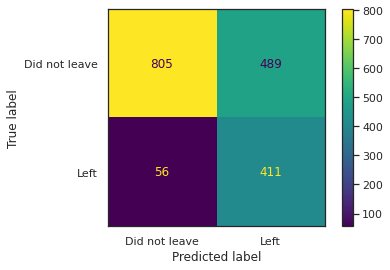

In [79]:
plot_confusion_matrix(best_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Did not leave', 'Left'])

We see that the optimized <b>XGBoost</b> model is a lot better at identifying people that <b>left the company</b>. Of the <b>467</b> people that left the company, <b>411 (88%)</b> were correctly identified. Before the optimisation, we only correctly identified <b>222 (47%)</b>. However the improvement was at the expense of people who did not leave. Before the optimisation we correctly identified <b>1182 (91%)</b> people that did not leave. Now we correctly classified <b>805 (65%)</b>. That said this may be better since we are more interested in people who might leave the company.

In [80]:
y_pred =  best_xgb.predict(X_test)

In [81]:
y_prob =  best_xgb.predict_proba(X_test)

In [82]:
print_evaluation_metric(y_test, y_pred)

Precision: [0.93495935 0.45666667]
Recall: [0.62210201 0.88008565]
F-score: [0.74709977 0.60131675]
Support: [1294  467]


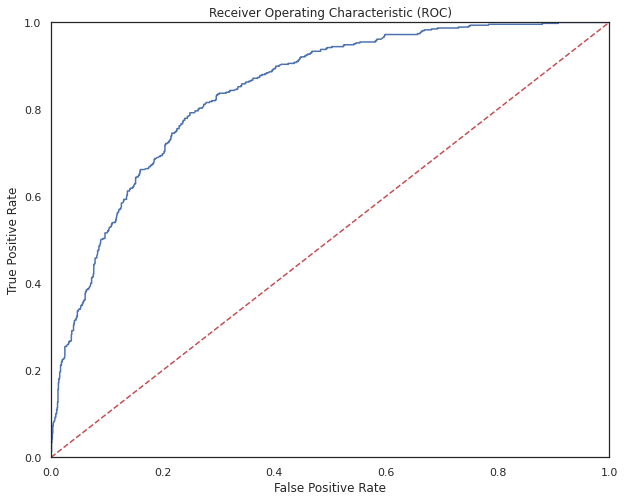

In [85]:
plot_roc_curve(y_test, y_prob, filename="ROC2.png", dpi=20)

weight:  {'Contract_Month-to-month': 1, 'MonthlyCharges': 7, 'Contract_One_year': 2, 'gender_Female': 1, 'TotalCharges': 5, 'Dependents_No': 1, 'PaymentMethod_Electronic_check': 1}
gain:  {'Contract_Month-to-month': 2073.73193, 'MonthlyCharges': 86.62023222857144, 'Contract_One_year': 58.420160300000006, 'gender_Female': 18.9935722, 'TotalCharges': 55.29686774, 'Dependents_No': 10.5209274, 'PaymentMethod_Electronic_check': 23.3646851}
cover:  {'Contract_Month-to-month': 2447.25, 'MonthlyCharges': 507.0357142857143, 'Contract_One_year': 341.5, 'gender_Female': 154.25, 'TotalCharges': 431.95, 'Dependents_No': 127.0, 'PaymentMethod_Electronic_check': 538.5}
total_gain:  {'Contract_Month-to-month': 2073.73193, 'MonthlyCharges': 606.3416256, 'Contract_One_year': 116.84032060000001, 'gender_Female': 18.9935722, 'TotalCharges': 276.4843387, 'Dependents_No': 10.5209274, 'PaymentMethod_Electronic_check': 23.3646851}
total_cover:  {'Contract_Month-to-month': 2447.25, 'MonthlyCharges': 3549.25, '

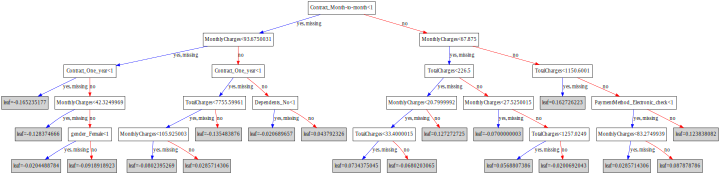

In [83]:
#A Visual of the XGBoost Tree


best_xgb = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=10.0,
                           learn_rate=0.1,
                           max_depth=5,
                           reg_lambda=10.0,
                           scale_pos_weight=5,
                           subsample=0.9,
                           colsample=0.5,
                           n_estimators=1 ## We set this to 1 so we can get gain, cover etc
                           )

best_xgb.fit(X_train,
           y_train)

bst = best_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {
    'shape': 'box',
    'style': 'filled rounded',
    'fillcolor': '#78cbe'
}

leaf_params = {
    'shape': 'box',
    'style': 'filled',
    'fillcover': '#e48038'
}

## Note: num_trees is not the number of trees to plot, but the specific tree you want to plot
## The default value is 0, but im setting it to show it in action since it is counter-intuitive
## xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10")

xgb.to_graphviz(best_xgb, num_trees=0, size="10,10",
               condition_node_params=node_params, 
              leaf_node_params=leaf_params)

## If you want to save the figure
# graph_data = xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10", condition_node_params=node_params, 
#                leaf_node_params=leaf_node_params)
# graph_data.view(filename='xgboost_tree_customer_churn') ## save as PDF

In [86]:
#saving model
best_xgb.save_model('/content/drive/MyDrive/Colab Notebooks/assign2/churnassignment.json')